### Qiskit Rust vs. Python Testing

tbd

In [6]:
sim = AerSimulator(method='statevector', device='GPU')

shots = 100
depth=10

time_thrust= []
time_cuStateVec= []
qubits_list = []

for qubits in range (15, 26):
    qubits_list.append(qubits)
    circuit = QuantumVolume(qubits, depth, seed=0)
    circuit.measure_all()
    circuit = transpile(circuit, sim)
    result = sim.run(circuit,sim,shots=shots,seed_simulator=12345,fusion_threshold=20,cuStateVec_enable=False).result()
    time_thrust.append(float(result.to_dict()['results'][0]['time_taken']))

    result_cuStateVec = sim.run(circuit,sim,shots=shots,seed_simulator=12345,fusion_threshold=20,cuStateVec_enable=True).result()
    time_cuStateVec.append(float(result_cuStateVec.to_dict()['results'][0]['time_taken']))

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Simulation device "GPU" is not supported on this system


IndexError: list index out of range

Now we plot them all together.

Text(0, 0.5, 'Simulation time (s)')

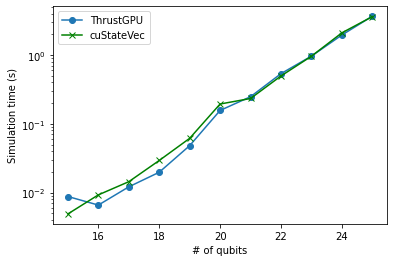

In [5]:
plt.yscale("log")
plt.plot(qubits_list, time_thrust, marker="o", label='ThrustGPU')
plt.plot(qubits_list, time_cuStateVec, 'g', marker="x", label='cuStateVec')
plt.legend()
plt.xlabel("# of qubits")
plt.ylabel("Simulation time (s)")